A feed forward neural network (nn) is a type of ANN where information moves in one direction: forward, from input modes, through hidden layers, to the output nodes. There are no feedback loops present. 

1. Use DataLoader to load our dataset and apply a tranform to the dataset. 
2. Implement a feed-forward nn with input layer, hidden layer and output layer. 
3. Apply activation functions. 
4. Set up loss and optimizer
5. Training loop that can use batch training
6. Evaluate our model and calculate the accuracy. 


In [4]:
import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

/Users/kanikasharma/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/dh/tsrw2wl11q32qb9k4sx645080000gn/T/matplotlib-3bj_eec6 because there was an issue with the default path (/Users/kanikasharma/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [5]:
# check if GPU is available and run on GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Hyperparameters are predefined configd estabslished before the training phase. 

In [6]:
input_size = 784 # 28x28 because MNIST images are 28x28, defines the size of input data (728 pixels)
hidden_size = 100 # number of nodes in the hidden layer (governs models complexity)
num_classes = 10 #(0-9 digits in the case of MNIST)
num_epochs = 2 # number of times we go through the entire dataset
batch_size = 100 # number of samples in one forward/backward pass
learning_rate = 0.001 # step size for adjusting the model's parameter during training

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(test_loader) # Creates an iterator from the dataloader
samples, labels = next(examples) # grab the next batch (image + labels)
print(f'Shape of samples:{samples.shape}, shape of labels: {labels.shape}')
# shape of samples:torch.Size([100, 1, 28, 28]), shape of labels: torch.Size([100])
# 1 is for grayscale, number of channels

Shape of samples:torch.Size([100, 1, 28, 28]), shape of labels: torch.Size([100])


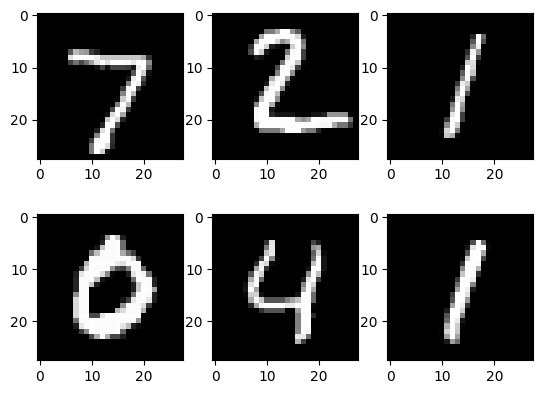

In [9]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__() #initialises the base class nn.Module
        self.l1 = nn.Linear(input_size, hidden_size) # first layer
        self.relu = nn.ReLU() # activation function to introduce non-linearity
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self,x):
        out = self.l1(x) # computes the output of the first layer
        out = self.relu(out) # Applies ReLU activation to the output 
        out = self.l2(out) # computes final output without any final activation
        # no activation and no softmax at the end 
        return out 
model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)


In [11]:
criterion = nn.CrossEntropyLoss() #(combines logsoftmax activation and negative log-liklihood loss)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # provides parameters, weights and biases



In [13]:
train_loader

In [ ]:
n_total_steps = len(train_loader) # total number of batches in the training set

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100,1,28,28 -> 100, 784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels) # calculates the loss/error between predicted outputs and actual label

        #backward pass
        optimizer.zero_grad() # set gradients to zero
        loss.backward() # backpropagation
        optimizer.step() # update weights 

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

print('Finished training')

epoch 1/2, step 100/600, loss = 0.5303
epoch 1/2, step 200/600, loss = 0.2793
epoch 1/2, step 300/600, loss = 0.2727
epoch 1/2, step 400/600, loss = 0.2824
epoch 1/2, step 500/600, loss = 0.1310
epoch 1/2, step 600/600, loss = 0.2212
epoch 2/2, step 100/600, loss = 0.4395
epoch 2/2, step 200/600, loss = 0.3645
epoch 2/2, step 300/600, loss = 0.2749
epoch 2/2, step 400/600, loss = 0.1602
epoch 2/2, step 500/600, loss = 0.1914
epoch 2/2, step 600/600, loss = 0.1773
Finished training


In [15]:
with torch.no_grad(): 
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs,1) # axis 1 indicates along a column, returns index/class with max logit value
        n_samples += labels.shape[0] # number of samples in the current batch
        n_correct += (predictions == labels).sum().item()

        acc = 100 * n_correct/n_samples
        print(f'accuracy = {acc}')

accuracy = 98.0
accuracy = 98.0
accuracy = 97.33333333333333
accuracy = 96.75
accuracy = 96.2
accuracy = 95.33333333333333
accuracy = 95.14285714285714
accuracy = 95.125
accuracy = 95.33333333333333
accuracy = 95.2
accuracy = 94.81818181818181
accuracy = 94.41666666666667
accuracy = 94.07692307692308
accuracy = 93.92857142857143
accuracy = 93.86666666666666
accuracy = 93.75
accuracy = 93.76470588235294
accuracy = 93.72222222222223
accuracy = 93.84210526315789
accuracy = 93.7
accuracy = 93.42857142857143
accuracy = 93.27272727272727
accuracy = 93.30434782608695
accuracy = 93.33333333333333
accuracy = 93.32
accuracy = 93.3076923076923
accuracy = 93.37037037037037
accuracy = 93.5
accuracy = 93.48275862068965
accuracy = 93.46666666666667
accuracy = 93.58064516129032
accuracy = 93.59375
accuracy = 93.6969696969697
accuracy = 93.82352941176471
accuracy = 93.91428571428571
accuracy = 93.83333333333333
accuracy = 93.94594594594595
accuracy = 93.89473684210526
accuracy = 93.74358974358974
accur